# Part I. Construct a Householder reflection of a vector.

Given a vector $\mathbf{x}$, and a plane with a normal vector $\mathbf{u}$, the Householder transformation reflects $\mathbf{x}$ about the plane.

The matrix of the Householder transformation is

$$
\mathbf{H} = \mathbf{1} - 2 \mathbf{u} \mathbf{u}^T
$$

So we have $H=1−2uuT$:

this is reflection across the plane orthogonal to $v$

suppose we have some vector $x$ and want to reflect it such that it becomes parallel to some unit vector $y$
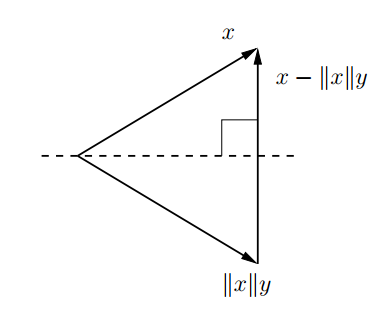
here we want to reflect around the place that is between $y$ and $x$ - that bisects the angle between them

the vector orthogonal to this place is $x−∥x∥y$

so let $u=x−∥x∥y$ and $v=\frac{u}{∥u∥}$



In [21]:
import numpy as np

from numpy.testing import assert_allclose


def householder(vec):
    vec = np.asarray(vec, dtype=float)
    if vec.ndim != 1:
        raise ValueError("vec.ndim = %s, expected 1" % vec.ndim)
    y = np.zeros_like(vec)
    norma = np.linalg.norm(vec)
    y[0] = norma
    rho = -np.sign(vec[0])
    vec1 = vec[0] + rho*norma
    v = vec /vec1
    v[0] = 1
    v2 = np.conjugate(v)
    H = np.eye(vec.shape[0])
    H -= (2 / (v @ v2) * np.outer(v , v2))
    return y, H

v = np.array([1, 2, 3])
v1, h = householder(v)
print(householder(v))

assert_allclose(np.dot(h, v1), v)
assert_allclose(np.dot(h, v), v1)

rndm = np.random.RandomState(1234)

vec = rndm.uniform(size=7)
v1, h = householder(vec)

assert_allclose(np.dot(h, v1), vec)

# Part II. Compute the QR decomposition of a matrix.

Given a rectangular $m\times n$ matrix $\mathbf{A}$, construct a Householder reflector matrix $\mathbf{H}_1$ which transforms the first column of $\mathbf{A}$ (and call the result $\mathbf{A}^{(1)}$)

$$
\mathbf{H}_1 \mathbf{A} =%
\begin{pmatrix}
\times & \times & \times & \dots & \times \\
0      & \times & \times & \dots & \times \\
0      & \times & \times & \dots & \times \\
&& \dots&& \\
0      & \times & \times & \dots & \times \\
\end{pmatrix}%
\equiv \mathbf{A}^{(1)}\;.
$$

Now consider the lower-right submatrix of $\mathbf{A}^{(1)}$, and construct a Householder reflector which annihilates the second column of $\mathbf{A}$:

$$
\mathbf{H}_2 \mathbf{A}^{(1)} =%
\begin{pmatrix}
\times & \times & \times & \dots & \times \\
0      & \times & \times & \dots & \times \\
0      & 0      & \times & \dots & \times \\
&& \dots&& \\
0      & 0      & \times & \dots & \times \\
\end{pmatrix}%
\equiv \mathbf{A}^{(2)} \;.
$$

Repeating the process $n-1$ times, we obtain

$$
\mathbf{H}_{n-1} \cdots \mathbf{H}_2 \mathbf{H}_1 \mathbf{A} = \mathbf{R} \;,
$$

with $\mathbf{R}$ an upper triangular matrix. Since each $\mathbf{H}_k$ is orthogonal, so is their product. The inverse of an orthogonal matrix is orthogonal. Hence the process generates the $QR$ decomposition of $\mathbf{A}$. 

In [6]:
import numpy as np
from numpy.testing import assert_allclose

def householder(vec):
    norma = np.linalg.norm(vec)
    rho = -np.sign(vec[0])
    vec1 = vec[0] + rho*norma
    v = vec /vec1
    v[0] = 1
    v2 = np.conjugate(v)
    H = np.eye(vec.shape[0])
    H -= (2 / np.dot(v, v2)) * np.outer(v , v2)
    return H

def qr_decomp(a):
    a1 = np.array(a, copy=True, dtype=float)
    m, n = a1.shape
    Q = np.eye(m)
    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = householder(a1[i:, i])
        Q = np.dot(Q, H)
        a1 = np.dot(H, a1)
    return Q, a1


np.set_printoptions(suppress=True)
# Test (marked)

rndm = np.random.RandomState(1234)
a = rndm.uniform(size=(5, 3))
q, r = qr_decomp(a)

# test that Q is indeed orthogonal
assert_allclose(np.dot(q, q.T), np.eye(5), atol=1e-10)

# test the decomposition itself
assert_allclose(np.dot(q, r), a)

from scipy.linalg import qr
qq, rr = qr(a)

assert_allclose(np.dot(qq, rr), a)
print('a', a)
print('q*r', q @ r)
print('qq', qq, 'q', qr_decomp(a)[0], sep = '\n')
print('rr', rr, 'r', qr_decomp(a)[1], sep = '\n')

a [[0.19151945 0.62210877 0.43772774]
 [0.78535858 0.77997581 0.27259261]
 [0.27646426 0.80187218 0.95813935]
 [0.87593263 0.35781727 0.50099513]
 [0.68346294 0.71270203 0.37025075]]
q*r [[0.19151945 0.62210877 0.43772774]
 [0.78535858 0.77997581 0.27259261]
 [0.27646426 0.80187218 0.95813935]
 [0.87593263 0.35781727 0.50099513]
 [0.68346294 0.71270203 0.37025075]]
qq
[[-0.13665049  0.53601299  0.09369752  0.661619   -0.49749149]
 [-0.56035895  0.0935397   0.53326881 -0.52477245 -0.34276292]
 [-0.19725922  0.65948912 -0.60068463 -0.37879015  0.14784752]
 [-0.62498418 -0.50418303 -0.52144688  0.18967657 -0.21750907]
 [-0.48765568  0.12171264  0.27224305  0.32774225  0.75222783]]
q
[[ 0.13665049  0.53601299  0.09369752  0.51365394  0.64915107]
 [ 0.56035895  0.0935397   0.53326881 -0.59459457  0.19831755]
 [ 0.19725922  0.65948912 -0.60068463 -0.32884957 -0.23916277]
 [ 0.62498418 -0.50418303 -0.52144688  0.12824695  0.25853456]
 [ 0.48765568  0.12171264  0.27224305  0.50796418 -0.644386

В матрицах $q$, $qq$ отличаются последние два столбца.Также матрица $r$ не всегда совпадает в знаках с $rr$, но это не сильно портит картину, потому что суммарно эти различия дают близкий к правильному ответ. Не будем трогать, пока работает. 

# Part III. Avoid forming Householder matrices explicitly.

Note the special structure of the Householder matrices: A reflector $\mathbf{H}$ is completely specified by a reflection vector $\mathbf{u}$. Also note that the computational cost of applying a reflector to a matrix strongly depends on the order of operations:

$$
\left( \mathbf{u} \mathbf{u}^T \right) \mathbf{A}  \qquad \textrm{is } O(m^2 n)\;,
$$
while
$$
\mathbf{u} \left( \mathbf{u}^T \mathbf{A} \right) \qquad \textrm{is } O(mn)
$$

Thus, it seems to make sense to *avoid* forming the $\mathbf{H}$ matrices. Instead, one stores the reflection vectors, $\mathbf{u}$, themselves, and provides a way of multiplying an arbitrary matrix by $\mathbf{Q}^T$, e.g., as a standalone function (or a class).

Write a function which constructs the `QR` decomposition of a matrix *without ever forming the* $\mathbf{H}$ matrices, and returns the $\mathbf{R}$ matrix and reflection vectors. Write a second function, which uses the reflection vertices to multiply a matrix with $\mathbf{Q}^T$. Make sure to include enough comments for a marker to follow your implementation, and add tests.

In [20]:

def without_h(a):
    a1 = np.array(a, copy=True, dtype=float)
    m, n = a1.shape
    r = np.zeros_like(a1)
    u_all = []
    for i in range(0, n):
        x = a1[i:, i]
        y = np.zeros_like(x)
        norma = np.linalg.norm(x)
        y[0] = norma
        u = (x - y)/np.linalg.norm(x - y)
        u = np.array(u.reshape(1, x.shape[0]))
        u_all.append(u)
        a1[i:, i:] = a1[i:, i:] - 2*(u.T @ u @ a1[i:, i:])
        r = a1
    return r, u_all

a1 = np.array(b, copy=True, dtype=float)
b = np.random.uniform(size=(5, 4))
qq1, rr1 = qr(b)

print('a1', a1)
print('rr1', rr1, 'r', without_h(b)[0], sep = '\n')


a1 [[0.19309053 0.43785882 0.24195758 0.68222689]
 [0.25292772 0.81530569 0.16484787 0.62843674]
 [0.39824171 0.44045427 0.58431464 0.84405454]
 [0.71333229 0.85183446 0.66859058 0.9151534 ]
 [0.38771601 0.81479589 0.37848176 0.56079988]
 [0.18403233 0.14996287 0.10894487 0.71806389]]
rr1
[[-1.45603939 -0.77072287 -0.99115915 -0.93020923]
 [ 0.          1.0713494   1.02536727  0.52485429]
 [ 0.          0.         -0.71936656 -0.09448287]
 [ 0.          0.          0.          0.64775259]
 [ 0.          0.          0.          0.        ]]
r
[[ 1.45603939  0.77072287  0.99115915  0.93020923]
 [ 0.          1.0713494   1.02536727  0.52485429]
 [ 0.         -0.          0.71936656  0.09448287]
 [ 0.         -0.          0.          0.64775259]
 [ 0.         -0.         -0.         -0.        ]]
